# EvalUMAP Task 1 - Getting Started Documentation
This notebook is a guide for:
- Initialising the gym-push environment for Task 1
- Requesting Task 1 training and testing data
- Training and Testing using gym-push
- Running simple example generative models
- Submitting Task 1 results

In [1]:
import gym
import random
import pandas as pd
%matplotlib inline

## Create an instance of the environment
Call this once to instantiate Task 1 of the gym-push environment

The environment contains the following useful methods/attributes:
- observation_space.info
- action_space.info
- request_data()
- evaluate()

In [2]:
env = gym.make('gym_push:evalumap1-v0')

EvalUMAP1-v0 environment


#### Action space

In [3]:
display(env.action_space.info)
print('Category labels:', env.action_space.info['category']['labels'].classes_)

{'appPackage': {'type': 'object', 'labels': LabelEncoder()},
 'category': {'type': 'object', 'labels': LabelEncoder()},
 'ledARGB': {'type': 'object', 'labels': LabelEncoder()},
 'priority': {'type': 'object', 'labels': LabelEncoder()},
 'vibrate': {'type': 'object', 'labels': LabelEncoder()},
 'visibility': {'type': 'object', 'labels': LabelEncoder()},
 'subject': {'type': 'object', 'labels': LabelEncoder()},
 'enticement': {'type': 'object', 'labels': LabelEncoder()},
 'sentiment': {'type': 'object', 'labels': LabelEncoder()}}

Category labels: ['alarm' 'email' 'event' 'msg' 'service' 'transport' 'unknown']


#### Observation space

In [4]:
display(env.observation_space.info)
print('App-last-used labels:', env.observation_space.info['timeAppLastUsed']['labels'].classes_)

{'timeAppLastUsed': {'type': 'object', 'labels': LabelEncoder()},
 'timeOfDay': {'type': 'object', 'labels': LabelEncoder()},
 'dayOfWeek': {'type': 'object', 'labels': LabelEncoder()},
 'unlockCount_prev2': {'type': 'int64',
  'max': 36,
  'min': -1,
  'mean': 7.556426500590573,
  'median': 6.0},
 'uniqueAppsLaunched_prev2': {'type': 'int64',
  'max': 30,
  'min': 0,
  'mean': 13.718350692580264,
  'median': 13.0},
 'dayOfMonth': {'type': 'int64',
  'max': 31,
  'min': 1,
  'mean': 15.81187587243638,
  'median': 16.0}}

App-last-used labels: ['few mins' 'immediate' 'over a week ago' 'within 24 hours'
 'within few hours' 'within half hour' 'within hour' 'within last week']


## Request training data from the environment
This method takes a boolean as an argument indicating whether or not you are requesting test data.
The default is to return train data.

#### Training 
If train, three dataframes are returned:
- training contexts - this dataframe contains the contexts in which notifications arrive
- training notifications - this dataframe contains the notifications
- training engagements - this dataframe contains the action taken toward a notification in the given context

All dataframes are ordered such that:
Notification[0] which arrived in context[0] had an action[0]
Notification[1] which arrived in context[1] had an action[1]
etc..

In [5]:
train_contexts, train_notifications, train_engagements = env.request_data()
print('Total number of training samples: ', len(train_contexts))
display(train_contexts.sample(1))
display(train_notifications.sample(1))
display(train_engagements.sample(1))

Total number of training samples:  9313


,timeAppLastUsed,timeOfDay,dayOfWeek,unlockCount_prev2,uniqueAppsLaunched_prev2,dayOfMonth
6802,immediate,evening,Fri,13,21,31


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
7488,com.google.android.googlequicksearchbox,unknown,transparent,default,unknown,private,unknown,low,low


,action
3778,1


#### Testing
When it is time to test on unseen context samples, one dataframe is returned:
- testing contexts - this dataframe contains the contexts in which notifications arrive

In [6]:
test_contexts = env.request_data(test=True)
print('Total number of testing samples: ', len(test_contexts))
display(test_contexts.head())

Total number of testing samples:  9312


,timeAppLastUsed,timeOfDay,dayOfWeek,unlockCount_prev2,uniqueAppsLaunched_prev2,dayOfMonth
8148,immediate,early-morning,Sun,2,14,13
662,immediate,morning,Sun,2,11,13
6451,immediate,morning,Sun,1,8,13
3820,within 24 hours,morning,Sun,6,15,13
1711,immediate,morning,Sun,2,17,13


## Example training and evaluation
The following is a suggested flow for training. 
1. Request the training data
2. Build adaptive model which generates personalised notifications given context
3. Test notifications generated from training data<br>*(Note: for testing, the environment expects a dataframe of notifications equal to the number of contexts received in #1)*

Randomly generated notifications:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,com.netflix.mediaclient,event,green,max,0200200200,secret,social networks,low,high
1,fm.castbox.audiobook.radio.podcast,alarm,white,default,0100,private,individual sports,moderate,high
2,com.tinder,event,blue,min,500,secret,computer security,high,high
3,com.intermedia.hq,msg,green,high,0100,secret,programming,low,high
4,com.Slack,event,blue,min,500,public,sports news,moderate,high


Testing the randomly generated notifications:


evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

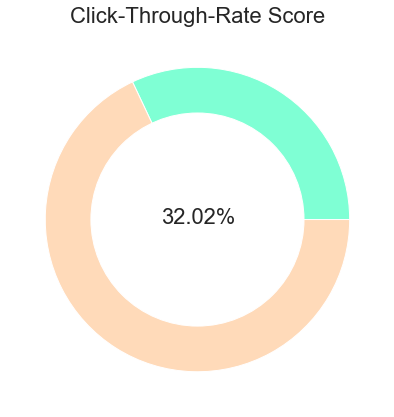

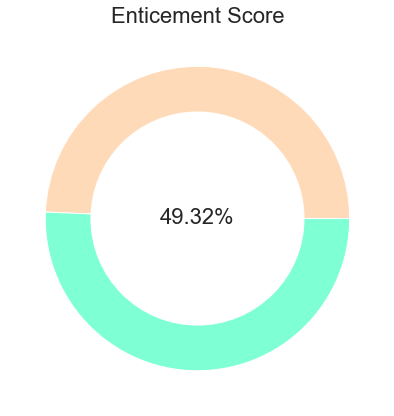

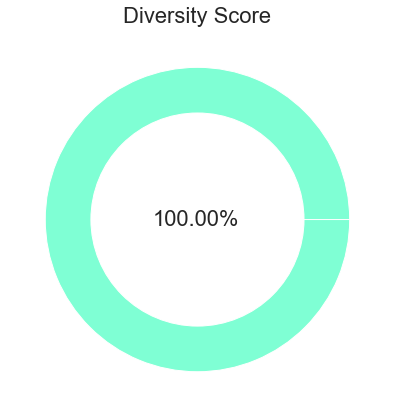

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 32.01975732846559}, {'model': 'Decision Tree', 'ctr_score': 34.01696553205197}, {'model': 'Naive Bayes', 'ctr_score': 21.668635241060883}, {'metric': 'diversity_score', 'score': 100.0}, {'metric': 'enticement_score', 'score': 49.32352625362397}]


In [7]:
# 1. Request the training data
training_contexts, training_notifications, training_engagements = env.request_data()

# 1.a Save the possible notification and context info
action_info = env.action_space.info
observation_info = env.observation_space.info

# 2. Build adaptive model 
# - here just generating random notification for demonstration purposes
# - achieved by sampling from the action space
random_notifications = [env.action_space.sample() for context in training_contexts.values]
random_notifications = pd.DataFrame(random_notifications)
print('Randomly generated notifications:')
display(random_notifications.head())

#3. Test notifications generated from training data
print('Testing the randomly generated notifications:\n\n')
env.evaluate(random_notifications)

## Example testing and evaluating
Once you have built a model and wish to test it on unseen data, the following is the suggested procedure:
1. Request the testing context data<br>*(Note: there may be feature values in the testing data which did not appear in the training data.<br>You can use the observation_space and action_space variables to identify all feature values)*
2. Generate notifications given the context data
3. Test the notifications generated from unseen contexts<br>*(Note: for testing, the environment expects a dataframe of notifications equal to the number of contexts received in #1)*

Randomly generated notifications:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,com.whatsapp,msg,unknown,low,none,public,electronics & electrical,high,high
1,com.google.android.calendar,email,transparent,min,500,secret,motor sports,high,high
2,fm.castbox.audiobook.radio.podcast,transport,blue,low,none,secret,programming,high,moderate
3,com.fitbit.FitbitMobile,email,green,max,0300,private,roleplaying games,low,low
4,com.google.android.apps.maps,email,transparent,max,none,private,computer security,moderate,low


Testing the randomly generated notifications:


evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

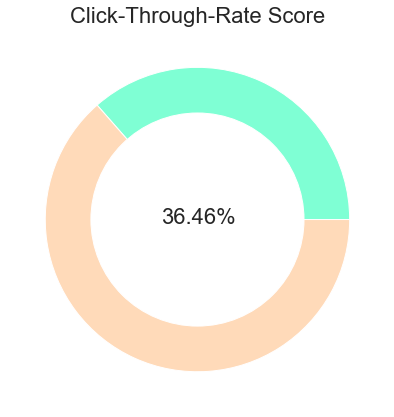

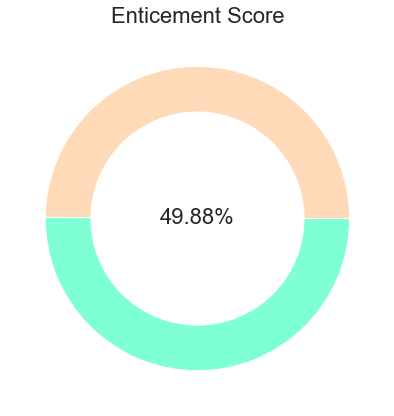

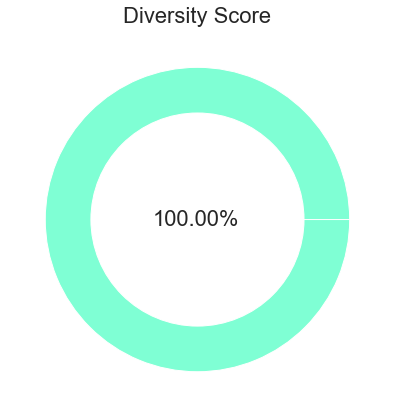

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/test/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 36.45833333333333}, {'model': 'Decision Tree', 'ctr_score': 41.01159793814433}, {'model': 'Naive Bayes', 'ctr_score': 23.883161512027492}, {'metric': 'diversity_score', 'score': 100.0}, {'metric': 'enticement_score', 'score': 49.88187285223368}]


In [8]:
# 1. Request the testing data
testing_contexts = env.request_data(test=True)

# 2. Build adaptive model (second method of generating a random notification)
def gen_rand_notification():
    notification = {}
    for feature in action_info:
        notification[feature] = random.choice(action_info[feature]['labels'].classes_)
    return notification

random_notifications = [gen_rand_notification() for context in testing_contexts.values]
random_notifications = pd.DataFrame(random_notifications)
print('Randomly generated notifications:')
display(random_notifications.head())

#3. Test notifications generated from training data
print('Testing the randomly generated notifications:\n\n')
env.evaluate(random_notifications)

## Simple notification generation
The following are a few methods of generating notifications using the historical engagement data:
1. Select a notification that was previously opened and repeat it N times, where N = number of contexts
2. Sample from only opened notifications N times, where N = number of contexts
3. Sample from highly enticing, positive, opened notifications

#### 1. Repeating notification which was previously opened
This method maximises the CTR metric, however, in practice with real users, this would be unrealistic as receiving the same notification over and over again would cause the user to disable or delete the app sending the notification. This highlights a limitation of using simulated users in gym-push for evaluation.
<br><br>However, the diversity metric attempts to address this limitation by identifying repeated notifications and scoring models lower for them. Better models will have a high range of diverse notifications as well as a high CTR.

Notification at epoch 0 was:  dismissed

Repeated notification from epoch 0:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low
2289,ie.rte.news,alarm,transparent,high,unknown,private,unknown,moderate,low



Testing notifications:

evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

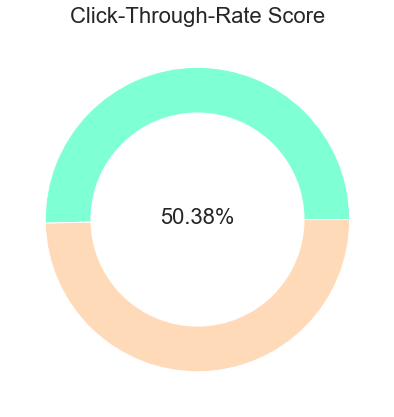

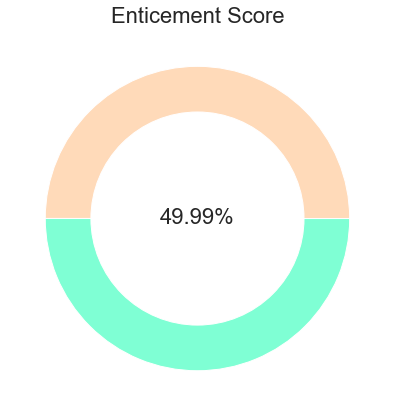

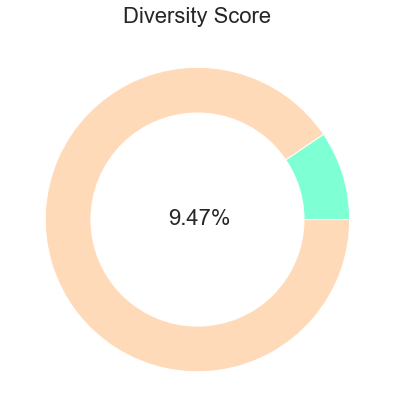

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 50.38118758724364}, {'model': 'Decision Tree', 'ctr_score': 76.21604209169978}, {'model': 'Naive Bayes', 'ctr_score': 0.09663910662514764}, {'metric': 'diversity_score', 'score': 9.473684210526317}, {'metric': 'enticement_score', 'score': 49.99}]


In [9]:
# Request the training data
training_contexts, training_notifications, training_engagements = env.request_data()

# Repeated notification which was opened
print('Notification at epoch 0 was: ', 'opened\n' if training_engagements.iloc[0].action==1 else 'dismissed\n')
opened_notification = training_notifications.iloc[[0]]
opened_notification_set = opened_notification.loc[opened_notification.index.repeat(len(training_contexts))]
print('Repeated notification from epoch 0:')
display(opened_notification_set.head())

#3. Test notifications generated from training data
print('\nTesting notifications:\n')
env.evaluate(opened_notification_set)

#### 2. Sampling notifications which were previously opened
Again this method tries to maximise the CTR metric, but also attempts to include a greater diversity in the types of notifications generated. While this method improves the diversity metric, with only a slight drop in CTR from the previous method, it is again a blunt method which may not translate to reality when evaluated with real users. 
<br><br>The enticement metric, engineered using a clickbait classifier, attempts to penalise the number of notifications which are overly enticing/persuasive. The idea being that the value of the notification should speak for itself as opposed to using persuasive language to nudge user's to open. A good model will attempt to limit the number of overly enticing notifications sent, while still ensuring good diversity. Therefore, to subsequently maximise the CTR, matching the correct context will become more important.

Sampled from pool of opened notifications:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,com.google.android.googlequicksearchbox,unknown,transparent,min,unknown,private,unknown,low,low
1,com.google.android.gm,email,transparent,default,unknown,private,unknown,low,high
2,com.Slack,msg,white,high,unknown,private,email & messaging,low,low
3,io.wia.wia,unknown,transparent,default,unknown,private,unknown,moderate,low
4,com.facebook.orca,service,transparent,default,unknown,public,team sports,low,low



Testing notifications:

evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

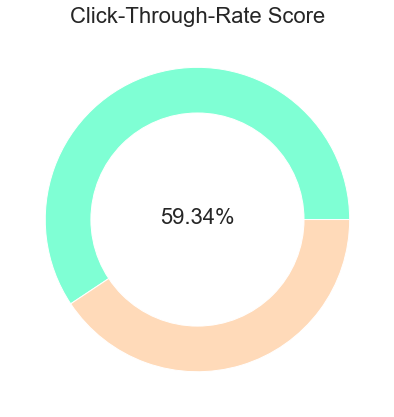

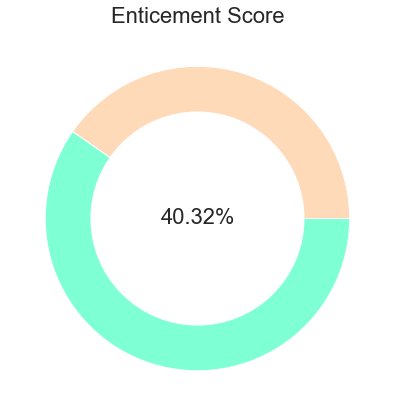

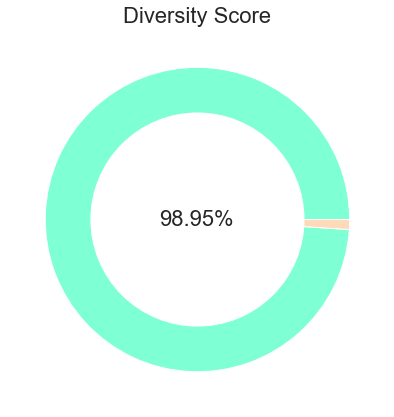

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 59.336411467840655}, {'model': 'Decision Tree', 'ctr_score': 65.17770857940513}, {'model': 'Naive Bayes', 'ctr_score': 77.76226779770214}, {'metric': 'diversity_score', 'score': 98.94736842105263}, {'metric': 'enticement_score', 'score': 40.319982819714376}]


In [10]:
# Request the training data
training_contexts, training_notifications, training_engagements = env.request_data()

# Sample from opened notifications
tmp = pd.concat([training_notifications, training_engagements], axis=1)
tmp = tmp[tmp.action==1]
sample_open_set = [tmp.sample().to_dict('r')[0] for context in training_contexts.values]
sample_open_set = pd.DataFrame(sample_open_set)
sample_open_set = sample_open_set.drop(['action'], axis=1)
print('Sampled from pool of opened notifications:')
display(sample_open_set.head())

#3. Test notifications generated from training data
print('\nTesting notifications:\n')
env.evaluate(sample_open_set)

#### 2. Sampling enticing, opened, positive notifications
This method attempts to use only positive notifications of low enticement which the user previously opened as a means to maximise the CTR. Note how the diversity metric suffers.

Sampled from pool of opened notifications:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,com.bskyb.sportnews,unknown,transparent,default,unknown,public,team sports,low,high
1,com.google.android.gm,email,transparent,default,unknown,public,unknown,low,high
2,com.whatsapp,msg,white,high,unknown,private,unknown,low,high
3,com.google.android.gm,email,transparent,default,unknown,private,unknown,low,high
4,com.google.android.gm,email,transparent,default,unknown,public,humor,low,high



Testing notifications:

evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

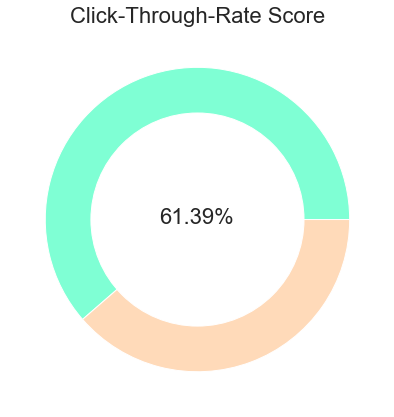

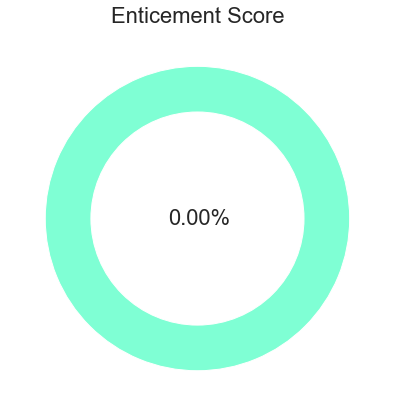

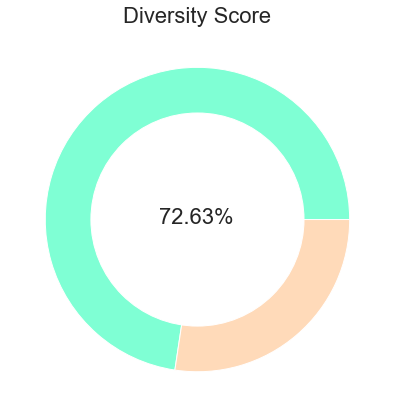

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/train/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 61.38730806399656}, {'model': 'Decision Tree', 'ctr_score': 65.96155911092022}, {'model': 'Naive Bayes', 'ctr_score': 75.80801030817138}, {'metric': 'diversity_score', 'score': 72.63157894736842}, {'metric': 'enticement_score', 'score': 0.0}]


In [11]:
# Request the training data
training_contexts, training_notifications, training_engagements = env.request_data()

# Sample from opened notifications
tmp = pd.concat([training_notifications, training_engagements], axis=1)
tmp = tmp[(tmp.action==1) & (tmp.enticement=='low') & (tmp.sentiment=='high')]
sample_entice_set = [tmp.sample().to_dict('r')[0] for context in training_contexts.values]
sample_entice_set = pd.DataFrame(sample_entice_set)
sample_entice_set = sample_entice_set.drop(['action'], axis=1)
print('Sampled from pool of opened notifications:')
display(sample_entice_set.head())

#3. Test notifications generated from training data
print('\nTesting notifications:\n')
env.evaluate(sample_entice_set)

## Example using Validation data
The following are the steps for obtaining validation results: 
1. Request the validation data
2. Apply your adaptive model which generates personalised notifications given context
3. Validate notifications generated <br>*(Note: for validation, the environment expects a dataframe of notifications equal to the number of contexts received in #1)*

Randomly generated notifications:


,appPackage,category,ledARGB,priority,vibrate,visibility,subject,enticement,sentiment
0,io.intercom.android,alarm,green,min,0100,secret,music & audio,moderate,moderate
1,com.Slack,transport,transparent,low,0200200200,secret,email & messaging,low,low
2,com.douglas.upflix,event,yellow,max,0300,public,humor,high,high
3,com.whatsapp,alarm,white,default,0300,private,dating & personals,high,moderate
4,com.facebook.orca,event,transparent,min,none,private,humor,low,high


Validating the randomly generated notifications:


evaluating.
evaluating..
evaluating...
evaluating....


<Figure size 432x432 with 0 Axes>

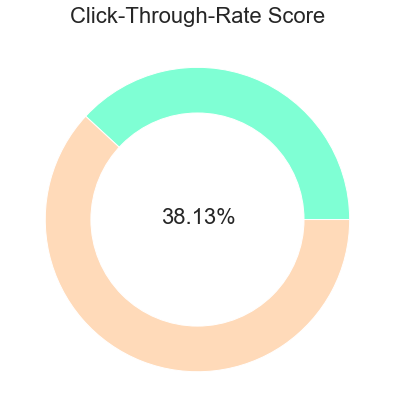

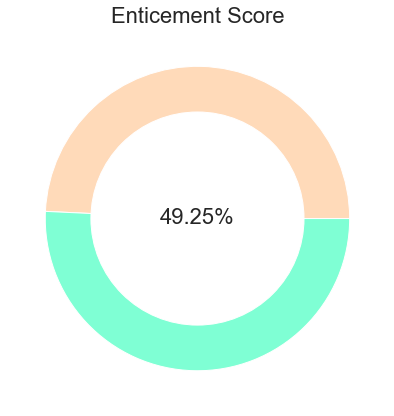

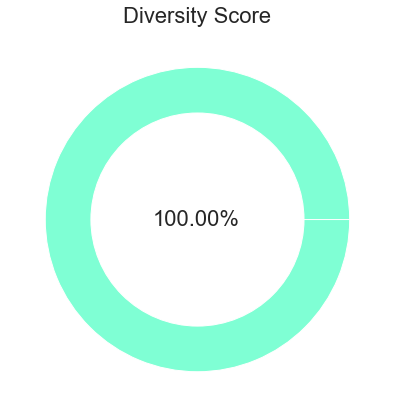

Results saved here:  c:\users\kieran\git\evalumap\2020\custom_gym\gym-push\gym_push\envs/results/validation/task1/
Evaluation results:

 [{'model': 'Adaboost', 'ctr_score': 38.1294964028777}, {'model': 'Decision Tree', 'ctr_score': 40.54547406850639}, {'model': 'Naive Bayes', 'ctr_score': 21.19617738644905}, {'metric': 'diversity_score', 'score': 100.0}, {'metric': 'enticement_score', 'score': 49.25373134328358}]


In [4]:
# 1. Request the testing data
validation_contexts = env.request_data(validation=True)
action_info = env.action_space.info

# 2. Load my model (using random model for demo purposes)
def gen_rand_notification():
    notification = {}
    for feature in action_info:
        notification[feature] = random.choice(action_info[feature]['labels'].classes_)
    return notification

random_notifications = [gen_rand_notification() for context in validation_contexts.values]
random_notifications = pd.DataFrame(random_notifications)
print('Randomly generated notifications:')
display(random_notifications.head())

#3. Validate notifications generated using model
print('Validating the randomly generated notifications:\n\n')
env.evaluate(random_notifications)